In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('retail_sales_dataset.csv')
df = pd.DataFrame(data)
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [148]:
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


###**Exploración de Datos Avanzada**
* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
*Crea subplots para comparar diferentes variables clave.
Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

In [149]:
# Convertimos el tipo de columna 'Date' a datetime

df['Date'] = pd.to_datetime(df['Date'])

print(df.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


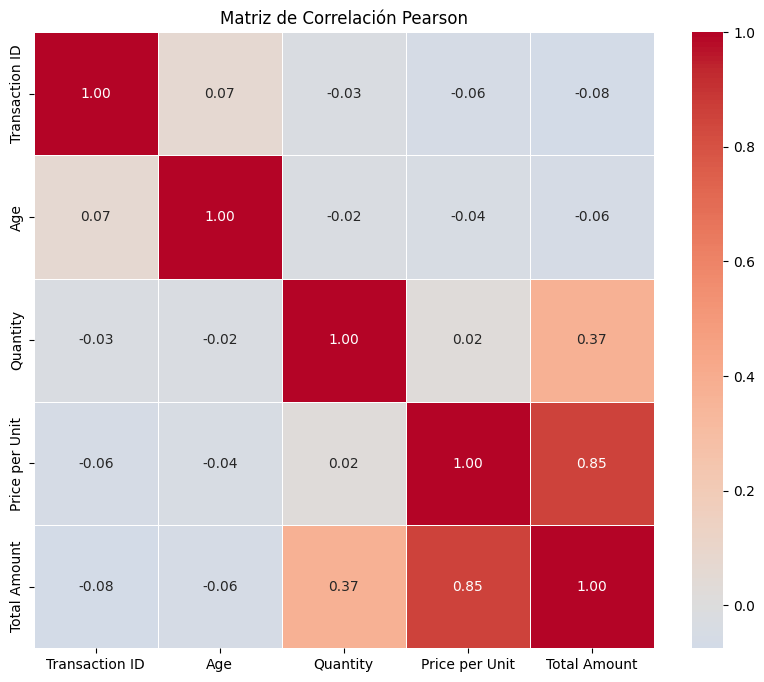

In [150]:
# Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

correlation_matrix = df.select_dtypes(include=['int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[correlation_matrix].corr('pearson') , annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Matriz de Correlación Pearson')
plt.show()

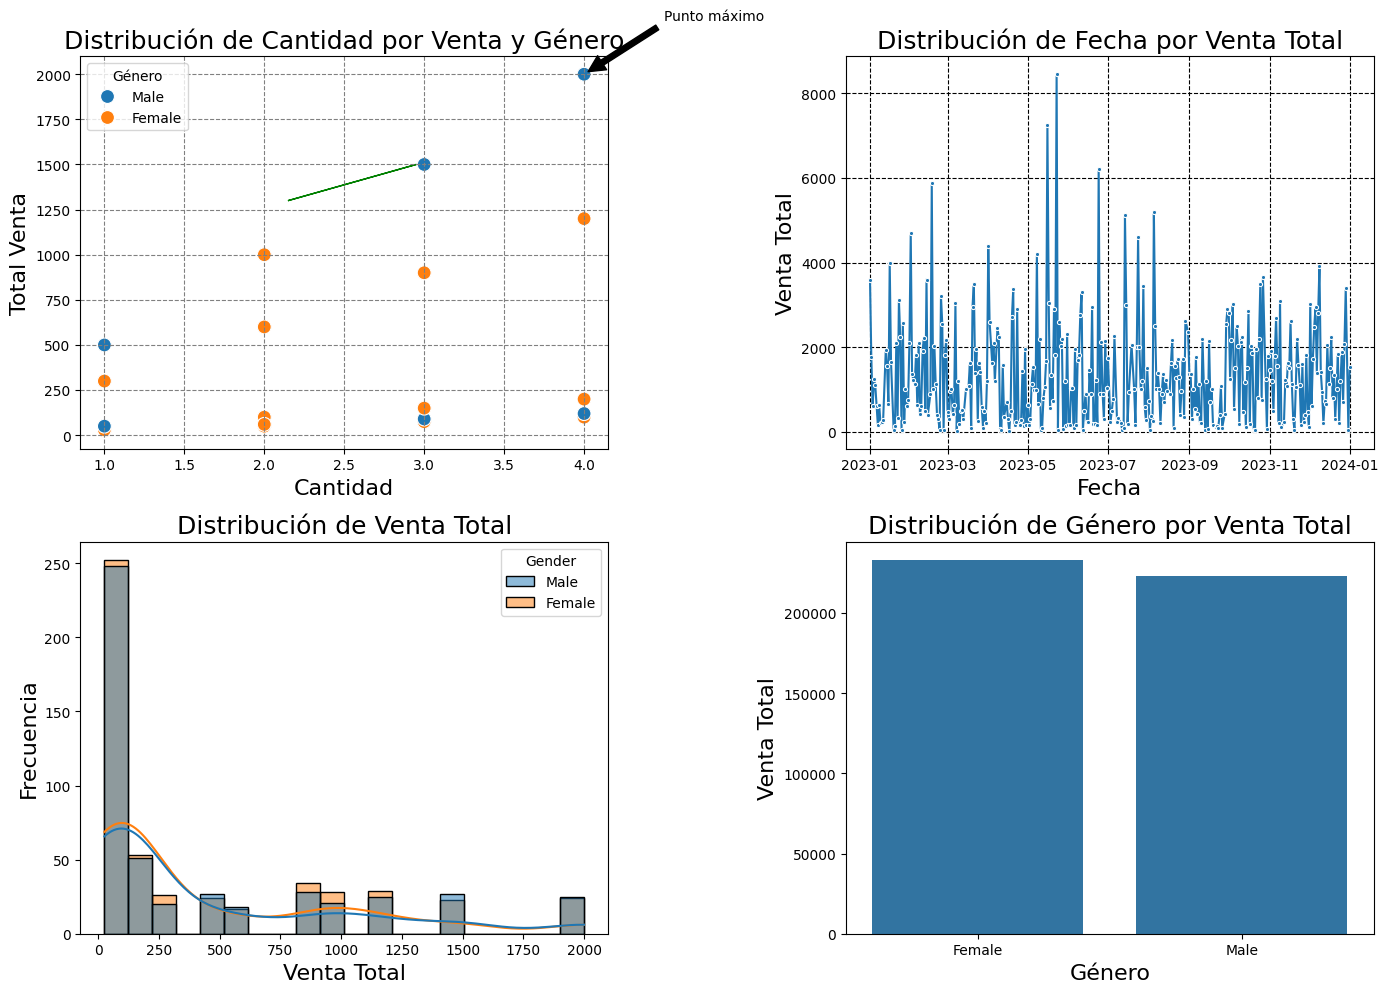

<Figure size 640x480 with 0 Axes>

In [186]:
# Crea subplots para comparar diferentes variables clave.

# Crea una figura y un eje
# Figura 1
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Crea un gráfico de boxplot con cuadrícula, leyenda, anotaciones y flechas
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Gender', s=100, ax=axs[0,0])

# Títulos y etiquetas
axs[0,0].set_title('Distribución de Cantidad por Venta y Género', fontsize=18)
axs[0,0].set_xlabel('Cantidad', fontsize=16)
axs[0,0].set_ylabel('Total Venta', fontsize=16)
axs[0,0].legend(loc='upper left', fontsize='large', shadow=True, title='Género')

# Añadir cuadrícula
axs[0,0].grid(True, color='gray', linestyle='--')
axs[0,0].legend(title='Género')

# Añadir anotación
axs[0,0].annotate("Punto máximo", xy=(4,2000), xytext=(4.5,2300),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Añadir flecha
axs[0,0].arrow(2.95, 1500, -0.8, -200, head_width=0, head_length=0.5, fc='green', ec='green')




# Figura 2
# Crea un gráfico de lineplot con cuadrícula, leyenda, anotaciones y flechas

# Creamos un groupby
df_grouped = df.groupby(['Date'])['Total Amount'].sum().reset_index()

sns.lineplot(data=df_grouped, x='Date', y='Total Amount', marker='.', ax=axs[0,1])

# Títulos y etiquetas
axs[0,1].set_title('Distribución de Fecha por Venta Total', fontsize=18)
axs[0,1].set_xlabel('Fecha', fontsize=16)
axs[0,1].set_ylabel('Venta Total', fontsize=16)
# Añadir cuadrícula
axs[0,1].grid(True, color='black', linestyle='--')





# Figura 3
# Crea un gráfico de histplot
sns.histplot(data=df, x='Total Amount', hue='Gender', bins=20, kde=True, ax=axs[1,0])
axs[1,0].set_title('Distribución de Venta Total', fontsize=18)
axs[1,0].set_xlabel('Venta Total', fontsize=16)
axs[1,0].set_ylabel('Frecuencia', fontsize=16)



#Figura 4
# Crea un gráfico de barra
df_grouped_g_t = df.groupby(['Gender'])['Total Amount'].sum().reset_index()
sns.barplot(data=df_grouped_g_t, x='Gender', y='Total Amount', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Género por Venta Total', fontsize=18)
axs[1, 1].set_xlabel('Género', fontsize=16)
axs[1, 1].set_ylabel('Venta Total', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Ajusta el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
